<a href="https://colab.research.google.com/github/Adith-Grokr/BankMarketing_Analysis/blob/LogisticRegression/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# **Read or View Data**

In [ ]:
data=pd.read_csv('bank-full.csv',sep=';', header=0)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


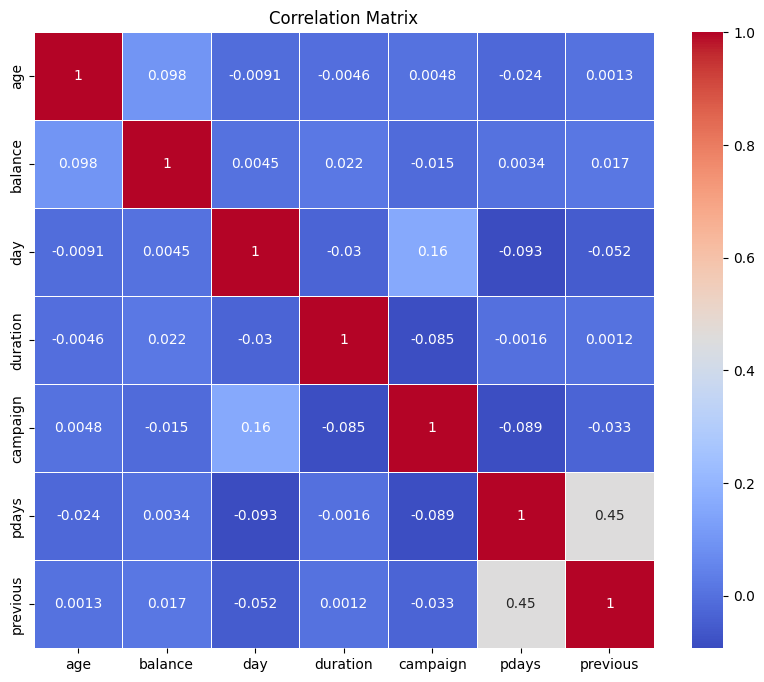

In [ ]:
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()
correlation_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data['y']=data['y'].map({'yes':1,'no':0})

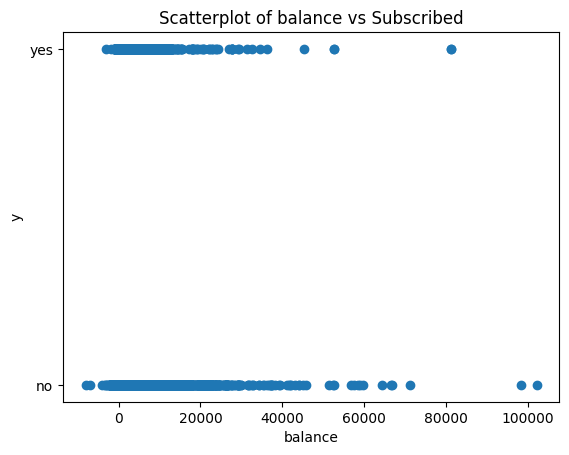

In [ ]:
plt.scatter(data['balance'], data['y'])
plt.xlabel('balance') # Replace with your x-axis label
plt.ylabel('y') # Replace with your y-axis label
plt.title('Scatterplot of balance vs Subscribed') # Replace with your title
plt.show()

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


<Axes: xlabel='y'>

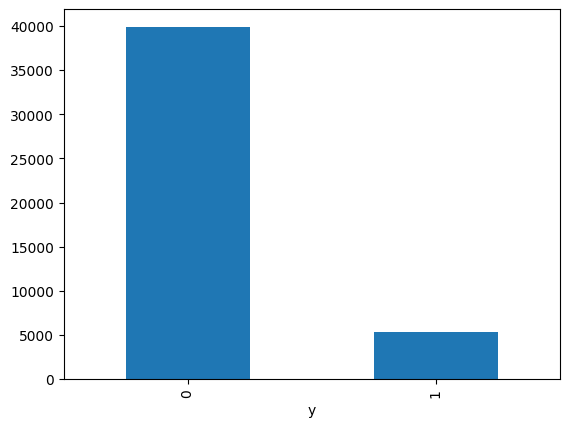

In [ ]:
data['y'].value_counts().plot(kind='bar')

In [ ]:
data.y


,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [ ]:
X=data.drop('y',axis=1)
Y=data['y']


In [ ]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [ ]:
Y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


# Normalize The Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'X' is your feature matrix
scaler = MinMaxScaler()
X = scaler.fit_transform(X[['age', 'balance', 'duration']])  # Select numerical features

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
X

array([[0.51948052, 0.09225936, 0.05307035],
       [0.33766234, 0.07306666, 0.03070354],
       [0.19480519, 0.07282153, 0.01545344],
       ...,
       [0.7012987 , 0.12468905, 0.22915819],
       [0.50649351, 0.07886805, 0.10329402],
       [0.24675325, 0.09977666, 0.07340382]])

In [ ]:
X_train

array([[0.50649351, 0.07877726, 0.14721431],
       [0.24675325, 0.08822835, 0.01281009],
       [0.22077922, 0.09843299, 0.02074014],
       ...,
       [0.22077922, 0.07573584, 0.05307035],
       [0.67532468, 0.07839595, 0.03029687],
       [0.36363636, 0.07332087, 0.03944693]])

# Train **Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
prediction=model.predict(X_test)

In [ ]:
prediction

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
Y_test

,y
14001,0
32046,1
13318,0
42991,0
14237,0
...,...
18448,1
6654,0
17106,0
9025,1


# Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy=accuracy_score(Y_test,prediction)

In [ ]:
accuracy

0.886431493973239

In [ ]:
report=classification_report(Y_test,prediction)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7980
           1       0.57      0.14      0.22      1063

    accuracy                           0.89      9043
   macro avg       0.73      0.56      0.58      9043
weighted avg       0.86      0.89      0.85      9043



Class Imbalance: If your dataset has a significant imbalance between class 0 and class 1 (e.g., many more class 0 samples than class 1), a high precision for the majority class (class 0) might not be as impressive. In such cases, the performance on the minority class (class 1) is more crucial.


<Axes: xlabel='y'>

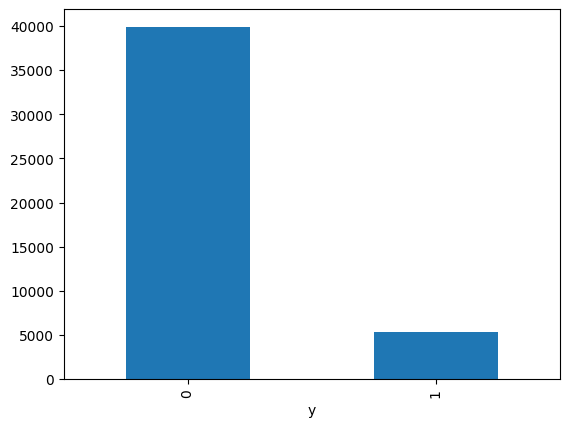

In [ ]:
data['y'].value_counts().plot(kind='bar')

In [ ]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(class_weight={0: 1, 1: 1})  # Or class_weight={0: 1, 1: 2} for custom weights
model2.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
prediction2=model2.predict(X_test)

In [ ]:
prediction2

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
report2=classification_report(Y_test,prediction2)
print(report2)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      7980
           1       0.30      0.61      0.41      1063

    accuracy                           0.79      9043
   macro avg       0.62      0.71      0.64      9043
weighted avg       0.87      0.79      0.82      9043

